# Exploratory Data Analysis (EDA)

Conduct EDA on Job Salaries to examine relationships between variables and other patterns in the data



* Import relevant libraries
* Load the data
* Exploring the data
* Choosing a dependent variable

### Imports

In [89]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
import os

from library.sb_utils import save_file

In [90]:
train_data = pd.read_csv('Train_rev1.csv')

print(train_data.shape)
train_data.head(4)

(244768, 12)


,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk


### Use .info() to see length and dtypes

In [91]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Id                  244768 non-null  int64 
 1   Title               244767 non-null  object
 2   FullDescription     244768 non-null  object
 3   LocationRaw         244768 non-null  object
 4   LocationNormalized  244768 non-null  object
 5   ContractType        65442 non-null   object
 6   ContractTime        180863 non-null  object
 7   Company             212338 non-null  object
 8   Category            244768 non-null  object
 9   SalaryRaw           244768 non-null  object
 10  SalaryNormalized    244768 non-null  int64 
 11  SourceName          244767 non-null  object
dtypes: int64(2), object(10)
memory usage: 22.4+ MB


### Check for duplicates

In [92]:
train_data.duplicated().sum()

0

### Identify numerical and categorical variables

In [93]:
train_data.columns

Index(['Id', 'Title', 'FullDescription', 'LocationRaw', 'LocationNormalized',
       'ContractType', 'ContractTime', 'Company', 'Category', 'SalaryRaw',
       'SalaryNormalized', 'SourceName'],
      dtype='object')

In [94]:
numeric_cols = ['SalaryNormalized ']

In [95]:
categorical_cols = ['Id','Title', 'FullDescription', 'LocationRaw', 'LocationNormalized', 'ContractType', 'ContractTime','Company', 'Category', 'SalaryRaw',
       'SalaryNormalized', 'SourceName']

### Summarize numerical and categorical variables separately

In [96]:
train_data.describe(include=[np.number])

,Id,SalaryNormalized
count,2.447680e+05,244768.000000
mean,6.970142e+07,34122.577576
std,3.129813e+06,17640.543124
min,1.261263e+07,5000.000000
25%,6.869550e+07,21500.000000
50%,6.993700e+07,30000.000000
75%,7.162606e+07,42500.000000
max,7.270524e+07,200000.000000


In [97]:
train_data.describe(include = ['O'])

,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SourceName
count,244767,244768,244768,244768,65442,180863,212338,244768,244768,244767
unique,135435,242138,20986,2732,2,2,20812,29,97286,167
top,Business Development Manager,What is expected of you as a Registered Nurse ...,London,UK,full_time,permanent,UKStaffsearch,IT Jobs,"50,000-74,999 yearly",totaljobs.com
freq,921,18,15605,41093,57538,151521,4997,38483,1923,48149


### Visualize target variable (salary)

C:\Users\narci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\narci\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


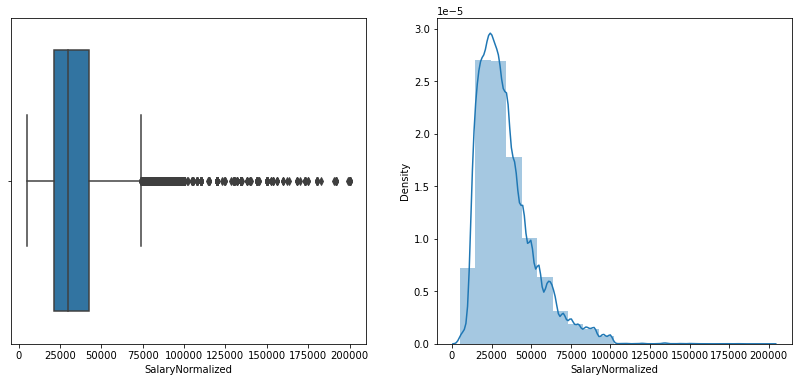

In [98]:
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(train_data.SalaryNormalized)
plt.subplot(1,2,2)
sns.distplot(train_data.SalaryNormalized, bins=20)
plt.show()

### Use IQR rule to identify potential outliers

In [99]:
stat = train_data.SalaryNormalized.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper, lower))

count    244768.000000
mean      34122.577576
std       17640.543124
min        5000.000000
25%       21500.000000
50%       30000.000000
75%       42500.000000
max      200000.000000
Name: SalaryNormalized, dtype: float64
The upper and lower bounds for suspected outliers are 74000.0 and -10000.0.


### Examine potential outliers

In [100]:
#check potential outlier below lower bound
train_data[train_data.SalaryNormalized < 8.5]

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName


In [101]:
#check potential outlier above upper bound
train_data.loc[train_data.SalaryNormalized > 222.5, 'Category'].value_counts()

IT Jobs                             38483
Engineering Jobs                    25174
Accounting & Finance Jobs           21846
Healthcare & Nursing Jobs           21076
Sales Jobs                          17272
Other/General Jobs                  17055
Teaching Jobs                       12637
Hospitality & Catering Jobs         11351
PR, Advertising & Marketing Jobs     8854
Trade & Construction Jobs            8837
HR & Recruitment Jobs                7713
Admin Jobs                           7614
Retail Jobs                          6584
Customer Services Jobs               6063
Legal Jobs                           3939
Manufacturing Jobs                   3765
Logistics & Warehouse Jobs           3633
Social work Jobs                     3455
Consultancy Jobs                     3263
Travel Jobs                          3126
Scientific & QA Jobs                 2489
Charity & Voluntary Jobs             2332
Energy, Oil & Gas Jobs               2255
Creative & Design Jobs            

In [102]:
# Check most suspicious potential outliers above upper bound
train_data[(train_data.SalaryNormalized > 222.5) & (train_data.Category == 'Part time Jobs')]

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
97003,69252147,Administrator Admin Assistant,looking for Logistics/inventory/distribution/r...,UK,UK,NaN,NaN,NaN,Part time Jobs,"More than $10,000",10000,Elance
110718,69671323,Oilfield Services Management Trainees Project...,If you are a recent College Graduate and would...,UK,UK,NaN,NaN,NaN,Part time Jobs,"About $48,000",48000,Elance
110724,69671702,Project Manager / Lead Visual Studio C Develop...,OVERVIEW: You will be responsible for analyzin...,UK,UK,NaN,NaN,NaN,Part time Jobs,"More than $10,000",10000,Elance
128065,70080343,Search Engine Optimizer Needed Google AdWords...,I am looking for a professional to work on ong...,UK,UK,NaN,NaN,NaN,Part time Jobs,"More than $10,000",10000,Elance
136382,70323356,Salesforcecom Administrator and Business Analy...,Technology company is building out and support...,UK,UK,NaN,NaN,NaN,Part time Jobs,"More than $10,000",10000,Elance
...,...,...,...,...,...,...,...,...,...,...,...,...
242088,72681744,development of a website and software to integ...,FKcloud is developing a private cloud system t...,UK,UK,NaN,NaN,NaN,Part time Jobs,"$30,000 - $50,000",40000,Elance
242089,72681851,Looking for AP Calculus teacher to create AP p...,We are looking for a current (preferred) high ...,UK,UK,NaN,NaN,NaN,Part time Jobs,"More than $10,000",10000,Elance
242090,72681860,iBook development Android iPhone iPad,Need direction in creating a Cookbook for IBoo...,UK,UK,NaN,NaN,NaN,Part time Jobs,"$5,000 - $10,000",7500,Elance
242091,72682010,Scaling a hightraffic website MySQL PHP Apach...,We have a growing hightraffic website that nee...,UK,UK,NaN,NaN,NaN,Part time Jobs,"$5,000 - $10,000",7500,Elance


The high-salary potential outliers all appear to be legitimate data. Most roles are I.T and executive roles and the junior positions are in industries that are well known for high salaries (oil, finance). We determine these entries to be legitimate and will not remove them.

In [103]:
def plot_feature(df, col):
    '''
    Make plot for each features
    left, the distribution of samples on the feature
    right, the dependance of salary on the feature
    '''
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        #change the categorical variable to category type and order their level by the mean salary
        #in each category
        mean = df.groupby(col)['SalaryNormalized'].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace=True)
        df[col].value_counts().plot()
    plt.xticks(rotation=90)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.subplot(1, 2, 2)

    if df[col].dtype == 'int64' or col == 'companyId':
        #plot the mean salary for each category and fill between the (mean - std, mean + std)
        mean = df.groupby(col)['SalaryNormalized'].mean()
        std = df.groupby(col)['SalaryNormalized'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
    else:
        sns.boxplot(x = col, y = 'SalaryNormalized', data=df)
    
    plt.xticks(rotation=90)
    plt.ylabel('SalaryNormalized')
    plt.show()

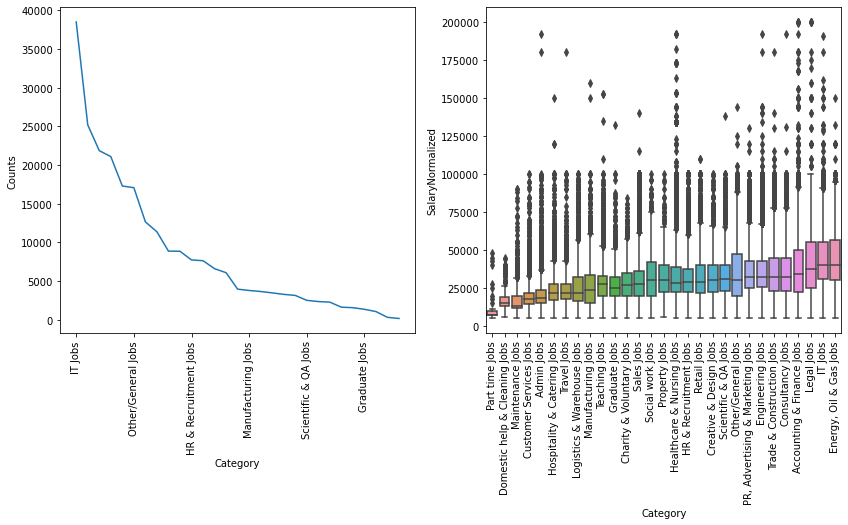

In [104]:
plot_feature(train_data, 'Category')

### There is a clear positive correlation between job category and salary

In [105]:
def encode_label(df, col):
    #encode the categories using average salary for each category to replace label
    cat_dict ={}
    cats = df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = train_data[train_data[col] == cat]['SalaryNormalized'].mean()   
    df[col] = df[col].map(cat_dict)

In [106]:
for col in train_data.columns:
    if train_data[col].dtype.name == "category":
        encode_label(train_data, col)

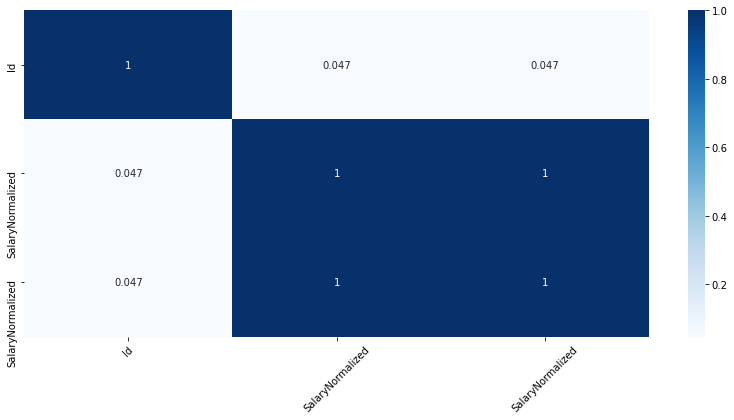

In [109]:
# Correlations between selected features and response
# Id is discarded because it is unique for individual

fig = plt.figure(figsize=(14, 6))
features = ['Id','Title', 'FullDescription', 'LocationRaw', 'LocationNormalized', 'ContractType', 'ContractTime','Company', 'Category', 'SalaryRaw',
       'SalaryNormalized', 'SourceName']
sns.heatmap(train_data[features + ['SalaryNormalized']].corr(), cmap='Blues', annot=True)
plt.xticks(rotation=45)
plt.show()

### We see that job Category is most strongly correlated with salary